In [1]:
import requests
import base64
from dataclasses import dataclass

In [2]:
def image_to_data_url(filename):
    # credits to https://stackoverflow.com/a/53688522
    ext = filename.split('.')[-1]
    prefix = f'data:image/{ext};base64,'
    with open(filename, 'rb') as f:
        img = f.read()
    return prefix + base64.b64encode(img).decode('utf-8')

In [3]:
@dataclass
class HuggingFaceSpaceClassifier:
    api_url: str
    
    def inference(self, image_fp: str):
        # Runs inference on a local image
        
        image_url = image_to_data_url(image_fp)
        resp = requests.post(
            self.api_url, 
            json={'data':[image_url]}
        )
        
        label_results = resp.json()['data'][0]
        print(f"Predicted {label_results['label']}")
        for conf in label_results['confidences']:
            print(f"\t{conf['label']} with confidence {conf['confidence']}")

In [4]:
api_url = 'https://hf.space/embed/rbarman/test_img_classifier/+/api/predict'
model = HuggingFaceSpaceClassifier(api_url)

HuggingFaceSpaceClassifier(api_url='https://hf.space/embed/rbarman/test_img_classifier/+/api/predict')


In [5]:
test_img_fp = './gradio_app/elephant.jpg'

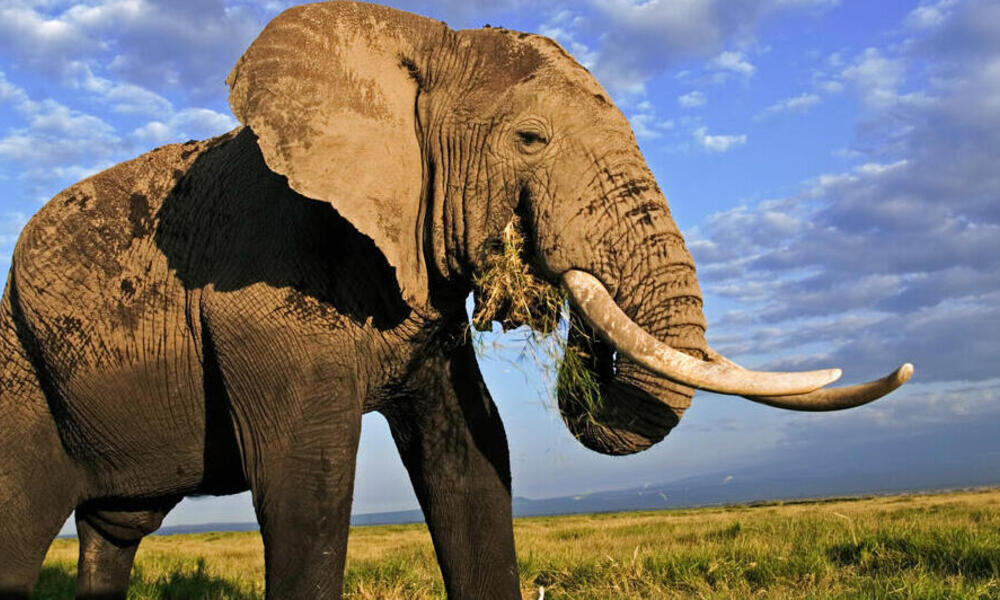

In [6]:
from IPython.display import Image
Image(filename=test_img_fp) 

In [7]:
model.inference(test_img_fp)

Predicted elephant
	elephant with confidence 0.9994623064994812
	rhino with confidence 0.0005377606139518321
